In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
import ipyvolume as ipv
import pandas as pd
import plotly.express as px
from time import time


def points_in_hull(p, hull, tol=1e-12):
    return np.all(hull.equations[:, :-1] @ p.T + np.repeat(hull.equations[:, -1][None, :], len(p), axis=0).T <= tol, 0)

In [29]:
hull = ConvexHull(np.random.rand(500, 3))
points = np.random.rand(125000, 3)
tic = time()
points_in_hull(points, hull).shape
toc = time()
print(toc - tic)

0.5870256423950195


In [9]:
loops = pd.read_csv('/home/gummz/cell/data/interim/pred/pred_2/LI_2019-02-05_emb5_pos4/loops_LI_2019-02-05_emb5_pos4_t0-288.csv')
loops_unp = pd.read_csv('/home/gummz/cell/data/interim/pred/pred_2/LI_2019-02-05_emb5_pos4/loops_LI_2019-02-05_emb5_pos4_t0-258_old.csv')


### Processed loops file plotting

In [3]:
sorted_dict = {k: len(v) 
    for k, v in sorted(loops.groupby(['timepoint', 'loop_id']).groups.items(), key=lambda item: len(item[1]), reverse=True)}
print(sorted_dict)


{(20, 58): 1064, (19, 54): 1049, (14, 59): 1003, (10, 69): 998, (11, 60): 959, (5, 96): 954, (5, 86): 948, (15, 63): 923, (17, 61): 919, (18, 55): 876, (8, 75): 858, (3, 74): 845, (4, 84): 830, (7, 62): 827, (0, 62): 818, (2, 69): 818, (2, 63): 780, (12, 54): 773, (288, 69): 765, (0, 54): 762, (4, 71): 761, (13, 56): 753, (280, 80): 753, (16, 55): 742, (14, 55): 727, (3, 66): 719, (1, 60): 718, (18, 51): 706, (253, 115): 702, (19, 52): 695, (16, 54): 693, (9, 56): 686, (1, 59): 685, (240, 85): 685, (228, 125): 683, (256, 70): 679, (250, 80): 670, (12, 57): 665, (4, 58): 662, (235, 90): 654, (252, 92): 647, (3, 68): 640, (6, 65): 639, (3, 60): 631, (6, 95): 629, (225, 60): 619, (13, 63): 604, (5, 66): 599, (284, 80): 595, (258, 84): 591, (243, 111): 584, (238, 101): 582, (247, 55): 582, (248, 75): 580, (243, 147): 577, (9, 58): 573, (283, 84): 568, (7, 72): 567, (231, 80): 566, (222, 132): 554, (247, 123): 554, (253, 75): 550, (241, 91): 549, (189, 60): 547, (221, 80): 545, (250, 143): 

In [22]:
loop = loops[(loops.timepoint == 13) & (loops.loop_id == 63)]
print(loop.shape)
print(loop)


(604, 5)
       timepoint  loop_id   z    y    x
72936         13       63  12  714  649
72937         13       63  12  714  650
72938         13       63  12  715  650
72939         13       63  12  715  651
72940         13       63  12  716  651
...          ...      ...  ..  ...  ...
73535         13       63  26  732  492
73536         13       63  26  733  491
73537         13       63  26  734  491
73538         13       63  26  735  491
73539         13       63  26  736  491

[604 rows x 5 columns]


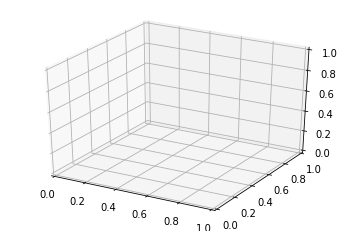

In [23]:

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

n_hull = 300
n_p = 500


z = np.random.randint(low=np.min(loop.z), 
                      high=np.max(loop.z), size=n_p)
y = np.random.randint(low=np.min(loop.y), 
                      high=np.max(loop.y), size=n_p)
x = np.random.randint(low=np.min(loop.x), 
                      high=np.max(loop.x), size=n_p)
P = np.array((x, y, z)).T
H = loop[['x', 'y', 'z']].values
hull = ConvexHull(H)
in_hull = points_in_hull(P, hull)

fig = px.scatter_3d(x=H[:, 0], y=H[:, 1], z=H[:, 2])
fig.add_scatter3d(x=P[in_hull, 0], y=P[in_hull, 1], z=P[in_hull, 2], mode='markers', marker=dict(size=2))
fig.add_scatter3d(x=P[~in_hull, 0], y=P[~in_hull, 1], z=P[~in_hull, 2], mode='markers', marker=dict(size=2))
fig.show()


### Unprocessed loop file plotting

In [11]:
sorted_dict = {k: len(v) 
    for k, v in sorted(loops_unp.groupby(['timepoint', 'loop_id']).groups.items(), key=lambda item: len(item[1]), reverse=True)}
print(sorted_dict)

{(11, 148): 1174, (19, 98): 1086, (20, 102): 1064, (12, 163): 1047, (14, 65): 1041, (10, 148): 998, (17, 98): 983, (5, 65): 954, (5, 114): 948, (16, 200): 934, (15, 148): 923, (7, 148): 894, (18, 162): 876, (8, 232): 858, (3, 148): 845, (4, 116): 830, (14, 148): 824, (0, 218): 818, (2, 54): 818, (252, 188): 817, (2, 162): 780, (240, 189): 779, (0, 66): 762, (4, 176): 761, (13, 114): 753, (196, 165): 753, (1, 163): 749, (8, 148): 749, (18, 98): 749, (248, 115): 738, (258, 168): 737, (4, 232): 732, (245, 122): 721, (228, 189): 720, (3, 218): 719, (241, 193): 705, (253, 57): 702, (256, 217): 701, (19, 54): 695, (249, 181): 695, (16, 102): 693, (6, 65): 691, (9, 218): 686, (1, 238): 685, (240, 216): 685, (6, 124): 681, (225, 159): 678, (251, 154): 676, (250, 115): 670, (17, 66): 669, (197, 51): 666, (12, 114): 665, (239, 122): 662, (235, 250): 654, (3, 69): 640, (15, 124): 639, (243, 50): 638, (3, 102): 631, (113, 197): 626, (247, 78): 624, (2, 148): 622, (231, 134): 617, (8, 106): 604, (1

In [18]:
loop_unp = loops_unp[(loops_unp.timepoint == 241) & (loops_unp.loop_id == 193)]
print(loop_unp.shape)
print(loop_unp)


(705, 5)
         timepoint  loop_id    y    x   z
1276273        241      193  571  790   5
1276274        241      193  571  791   5
1276275        241      193  572  791   5
1276276        241      193  572  792   5
1276277        241      193  572  793   5
...            ...      ...  ...  ...  ..
1289183        241      193  277  982  23
1289184        241      193  278  981  23
1289185        241      193  279  980  23
1289186        241      193  280  979  23
1289187        241      193  281  979  23

[705 rows x 5 columns]


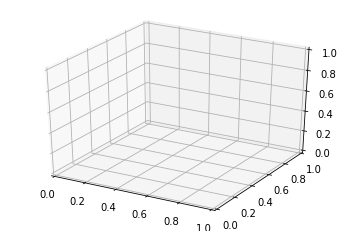

In [19]:

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

n_hull = 300
n_p = 500


z = np.random.randint(low=np.min(loop_unp.z), 
                      high=np.max(loop_unp.z), size=n_p)
y = np.random.randint(low=np.min(loop_unp.y), 
                      high=np.max(loop_unp.y), size=n_p)
x = np.random.randint(low=np.min(loop_unp.x), 
                      high=np.max(loop_unp.x), size=n_p)
P = np.array((x, y, z)).T
H = loop_unp[['x', 'y', 'z']].values
hull = ConvexHull(H)
in_hull = points_in_hull(P, hull)

fig = px.scatter_3d(x=H[:, 0], y=H[:, 1], z=H[:, 2])
fig.add_scatter3d(x=P[in_hull, 0], y=P[in_hull, 1], z=P[in_hull, 2], mode='markers', marker=dict(size=2))
fig.add_scatter3d(x=P[~in_hull, 0], y=P[~in_hull, 1], z=P[~in_hull, 2], mode='markers', marker=dict(size=2))
fig.show()


In [34]:
np.sum(in_hull)

132

In [26]:
fig = ipv.figure()
ipv.scatter(H[:, 0], H[:, 1], H[:, 2], color='blue')
ipv.scatter(P[in_hull, 0], P[in_hull, 1], P[in_hull, 2], color='green')
ipv.scatter(P[~in_hull, 0], P[~in_hull, 1], P[~in_hull, 2], color='red')
ipv.show()

In [18]:
in_hull.shape

(500,)